<a href="https://colab.research.google.com/github/Rekkice/ADA-Informes/blob/main/Informe13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#I

##¿Qué quiere decir que un problema es NP-Hard?

Los problemas NP-Hard es un conjunto de problemas los cuales no pueden ser resueltos en tiempo polinomial, estos problemas tienen como mínimo la misma dificultad que un problema del tipo NP-Complete, estos últimos siendo los problemas más dificiles del conjunto NP. Existe una teoria sobre los NP-Hard que explica que todos los problemas NP-Hard son variantes de un mismo problema, lo que se refiere a que si uno encuentra un algoritmo capaz de resolver algún problema NP-Hard, al mismo tiempo, estaría encontrando un algoritmo para resolver los otros miles de problemas existentes.

##¿Qué quiere decir que *P  $\neq$ NP*?

La conjetura *P  $\neq$ NP* es una de las preguntas más importantes en las ciencias computacionales y uno de los mayores problemas matemáticos sin respuesta, esta conjetura habla sobre los problemas que se pueden **resolver** en tiempo polinomial y los problemas que se pueden **verificar** en tiempo polinomial respectivamente, esta conjetura no se ha demostrado que sea correcta, pero tampoco lo contrario, por lo que no es incorrecto decir que *P = NP*. La conjetura inicial (P $\neq$ NP) aunque sea lo más probable, solo con que exista **un** solo algoritmo que resuelva un problema NP-Hard en tiempo polinomial demostraria que esta es falsa y que todos los algoritmos NP-Hard pueden ser resueltos en tiempo polinomial, por lo que en ese caso *P = NP*.

##¿Cómo se prueba que un problema es NP-Hard usando reducciones?

Para probar que un problema es NP-Hard se debe agarrar otro problema, al que llamaremos "A", que **sabemos** que es NP-Hard, debemos tomar nuestro problema original (al que llamaremos B) y trataremos de reducir el problema "A" al problema "B", es decir, intentar que el problema "A" sea resuelto con las soluciones del problema "B", si logramos hacer esta reducción demostramos que el problema "B" es NP-Hard, esto cobra sentido si tenemos en cuenta la teoria explicada con anterioridad que dice que todos los problemas NP-Hard son un mismo problema, tan solo una variante.

#II

## Problema de Clique

El problema del clique es un problema de decisión que se considera como NP-Complete. Un clique es un subconjunto de vértices de un grafo en donde todos sus vértices están conectados entre ellos. El problema consiste en encontrar si el grafo contiene un clique de al menos tamaño  $k$. Existe un problema de optimización relacionado que consiste en encontrar el clique máximo de un grafo.

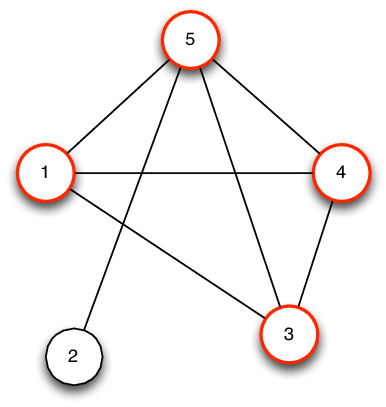

## Problema de Vertex Cover
El problema de Vertex Cover (o Cobertura de vértices), es un problema NP-Complete que consiste en encontrar un conjunto de vértices $V$ que cubra todos los nodos del grafo.

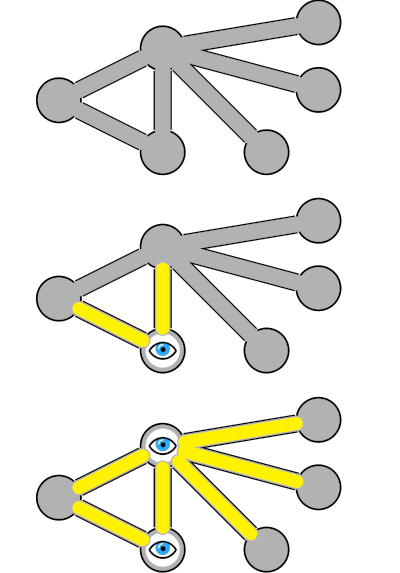

#III

##Demostración utilizando reducción

## Problema de Clique

Para probar que el problema del clique es NP-Hard, se puede usar el problema de satisfacción de circuitos para demostrar que puede ser reducido en un tiempo polinomial. Con la expresión  $F=(x_1∧x_2)∨(x_1‘∧x_2‘)∨(x_1∧x_3)$, donde $x‘$ es el complemento de $x$, consideremos cada expresión dentro de cada paréntesis como una cláusula. Así, tendríamos 3 cláusulas,  $C_1$ ,  $C_2$  y  $C_3$.

Luego, para el preproceso, se forma un grafo que tiene un vértice para cada par (V, C), donde V es una variable o su negación, y C es una cláusula que contiene V. Los vértices están conectados si representan una asignación de sus variables que es compatible con sus cláusulas. La formula sólo se satisface sólo si existe un clique de $k$ vértices. Entonces, el problema quedaría reducido al problema *3-SAT*.

Para el posproceso, se prueba la entrada con las cláusulas definidas anteriormente, y se retorna *true* o *false* dependiendo de si es compatible o no. Si es compatible, significa que el Clique sí existe y esa sería la solución del problema inicial de Clique.

##Problema de Vertex Cover

Para probar que el Problema de Vertex Cover es NP-Hard, se puede usar el problema del independent set para demostrar que puede ser reducido en un tiempo polinomial, donde el problema que queda es el siguiente: si tenemos un grafo G, existe un conjunto independiente tal que este tenga K vertices.

Se tiene la propiedad de que, en un grafo $G = (V, E)$, $S$ es un conjunto independiente y $(V-S)$ es el conjunto que cubre los vértices.

Para probar que la propiedad se cumple, tenemos que si $S$ es un conjunto independiente, no hay arco $(u, v)$ en donde los dos nodos $u$ y $v$ pertenezcan a $S$. Por lo tanto, para cada arco $(u, v)$ del grafo, por lo menos uno de los nodos debe pertenecer al conjunto $(V-S)$.

Entonces, para el preproceso, no hace falta cambiar nada porque la entrada es la misma. Pero en el posproceso, se eliminan los nodos en el conjunto $S$ del total de nodos del grafo $V$ y se obtiene el resultado del problema Vertex Cover.

#IV

##Algoritmos que pueden solucionar los problemas anteriores

### **Problema del clique**

Un algoritmo que busca los máximos cliques viene siendo el algoritmo de Bron-Kerbosch, este algoritmo es altamente utilizado para el area de química computacional, aunque en teoría existen algoritmo más eficientes en tiempo, en la practica se ha demostrado que este es más eficiente que los demás.

El algoritmo de Bron-Kerbosch puede ser implementado de **tres** distintas maneras:

**Sin Pivote:**
Esta implementación de tipo recursiva dado tres conjuntos de nodos ajenos llamados "R","P" y "X" busca la mayor cantidad de cliques que contengan todos los vertices en "R", algunos de "P" y **ninguno** de "X", el algoritmo en cada llamada une los conjuntos "P" y "X" una vez se mezclan con "R", de esta forma formando un clique. Cuando ambos "P" y "X" se encuentran vacíos, significa que no hay más vértices que puedan ser añadidos, por lo que "R" pasa a ser el máximo clique obtenido.

La recursion comienza inicializando "R" (conjunto solución) y "X" (conjunto visitado) como conjuntos vacíos y "P" el conjunto de vértices del grafo. En cada llamada, el algoritmo considera todos los vértices de "P" al mismo tiempo, si no existen, se toma como "R" el máximo clique **si** "X" se encuentra vacio. Para cada vértice "v" del conjunto "P" se hace una llamada recursiva donde "v" es añadido a "R", donde "P" y "X" quedan restringidos al conjunto vecino $N_{(v)}$ de "v", el cual encuentra todos los posibles cliques de "R" que contengan "v". Luego mueve "v" desde "P" a "X" para excluirlo de futuras llamadas y sigue con el siguiente vértice de "P"

**Con Pivote:**

Para evitar hacer llamadas recursivas en cada clique, siendo estos máximo o no, se implementó el metodo de "pivot vertex". Este metodo elige un pivote "u" desde el comjunto "P". Cualquier máximo clique **debe** incluir "u" o uno de sus "no vecinos", sino, el clique se vería aumentado a la hora de añadir "u", Debido a esto, **solo** "u" y sus "no vecinos" deben ser probados como elecciones para el vertice "v" que es luego añadido a "R" en cada llamada recursiva del algoritmo.

**Tiempo de ejecución:**

Este algoritmo se utiliza por que es eficiente en el sentido de un **peor** caso, lo que quiere decir es que es más rapido que sus alternativas las cuales son sensibles ante la salida de los datos, lo que quiere decir, a mayor la salida, mayor tiempo de ejecución tiene. El algoritmo de Bron-Kerbosch tiene un tiempo de ejecución cuando se utiliza pivote para minimizar las llamadas recursivas de $O(3^{n/3})$, esto es debido a que cada gráfo de n vértices tiene como mucho $3^{n/3}$ cliques máximos.

Existe una tercera variante que utiliza degeneración de nodos y un metodo llamada "ordenamiento de vértices" que puede ser ejecutado en tiempo $O(dn^{d/3})$, donde "d" es la degeneración del grafo, una forma de medir el esparcimiento de sus nodos. Existen "d" grafos degenerados por un total máximo de $(n-d)3^{d/3}$ cliques.

Lo que busca este último metodo es minimizar las llamadas recursivas ordenando los vértices según su grado para de esta forma minimizar los conjuntos de "P" candidatos para vértice.

**Pseudo-código de algoritmo sin pivote** 

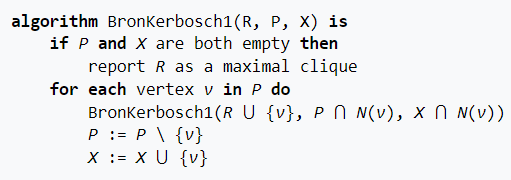

**Pseudo-código de algoritmo con pivote:**


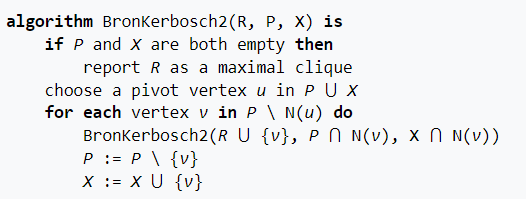

###**Vertex cover**

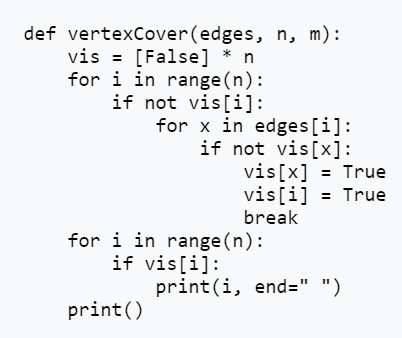

este código sirve para procesar problemas de funciona de la siguiente manera:

1. Crea un arreglo booleano su tamaño igual a la cantidad de arcos, este arreglo marca si un arco ha sido visitado o no
2. se realiza un primer ciclo revisando si un arco ha sido visitado o no.
3. si el arco no ha sido visitado, se entra a un segundo ciclo en el cual, si los arcos que conectan con el nodo no han sido visitados, se marcan como visitados y se marca el arco principal como visitado.

En cuanto al tiempo de ejecución del algoritmo, este se ejecuta en un tiempo de $O(N+M)$, esto debido a que se recorre todos los arcos y nodos del grafo.
